In [352]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


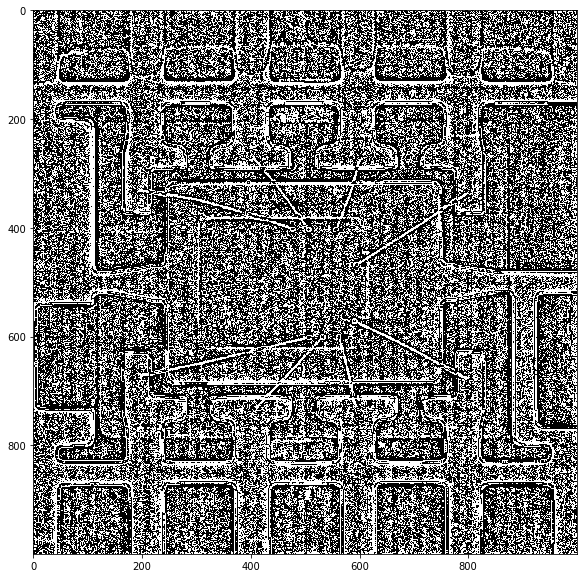

In [353]:
img0 = cv2.imread("WS06.jpg")
img0 = (img0)*3 + 40
img0 = cv2.GaussianBlur(img0,(5,5),3)
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(img0,cv2.CV_64F)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(laplacian,cmap = 'gray')

Number of Contours found = 205


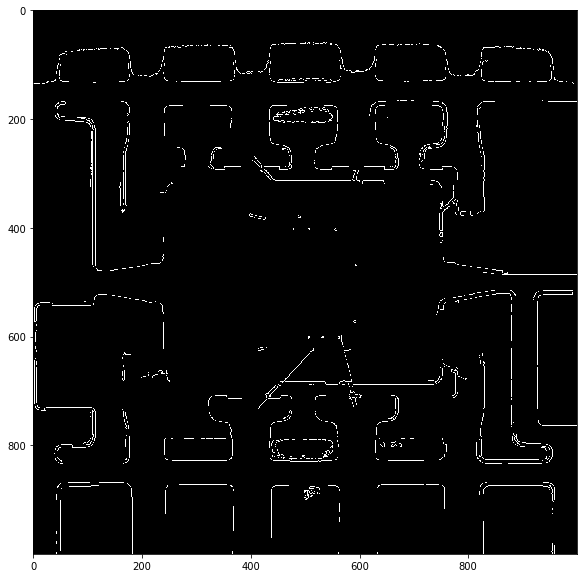

In [354]:
# Find Canny edges 
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
  
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(edged,cmap = 'gray')
  
print("Number of Contours found = " + str(len(contours))) 

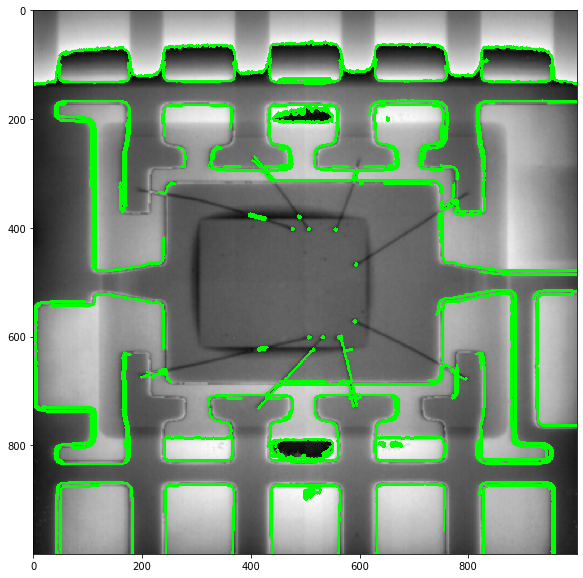

In [355]:
# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(img0, contours, -1, (0, 255, 0), 3) 
  
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(img0,cmap = 'gray')

In [356]:
count = 0
for x in range(132):
    if hierarchy[0,x,2]!=-1:
        count +=1
print(count)

26


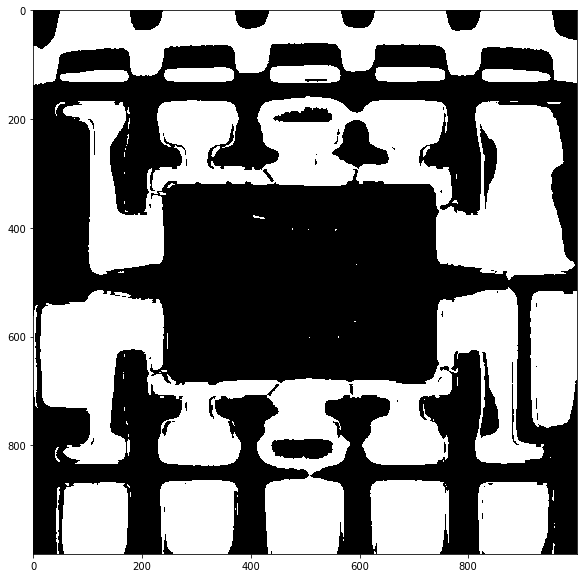

In [357]:
ret,th1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(th1,cmap = 'gray')

162


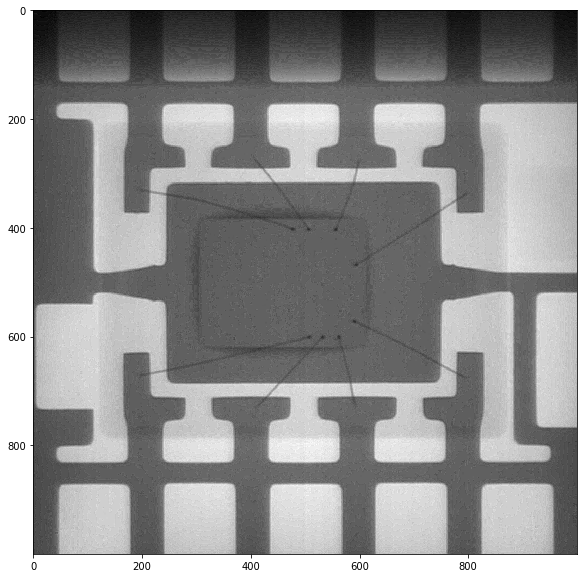

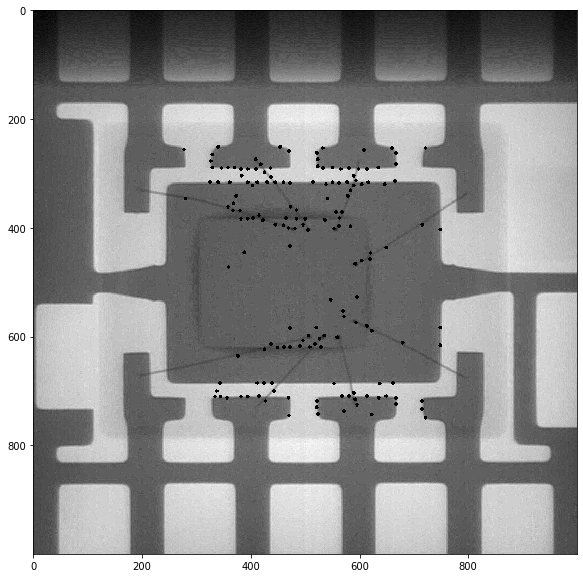

In [424]:
import cv2 
import numpy as np 
centres = []
img = cv2.imread('WS06.jpg')//2
img = cv2.GaussianBlur(img,(5,5),5)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
# for i in range(gray.shape[0]):
#     for j in range(gray.shape[1]):
#         if(gray[i,j]>110):
#             gray[i,j]=255
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
gray = cv2.filter2D(gray, -1, kernel)
#gray = cv2.bilateralFilter(gray, 11, 17, 17)
avg = gray.mean()
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(gray,cmap = 'gray')
for i in range(10):
    copy = gray.copy()
    detected_circles = cv2.HoughCircles(gray,  
                       cv2.HOUGH_GRADIENT, 1.5, 10, param1 = 50, 
                   param2 = 1, minRadius = 0, maxRadius = 1) 
    
    radius = 0
    count = 0
    epsilon = r/10
    # Draw circles that are detected. 
    if detected_circles is not None: 

        # Convert the circle parameters a, b and r to integers. 
        detected_circles = np.around(detected_circles)

        for pt in detected_circles[0, :]: 
            a, b, r = pt[0], pt[1], pt[2]

            if a>copy.shape[0]*.25 and a < copy.shape[0]*.75 and b >copy.shape[0]*.25 and b < copy.shape[1]*.75:
                if gray[int(a),int(b)]<avg*.75:
                    cv2.circle(copy, (a, b), int(r+2), (0, 255, 0), 2) 
                    cv2.circle(copy, (a, b), 1, (0, 0, 255), 3)
                    count += 1
                    centres.append((a,b))
                    centres.append((a+1,b+1))
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(copy,cmap = 'gray')
print(count)

14


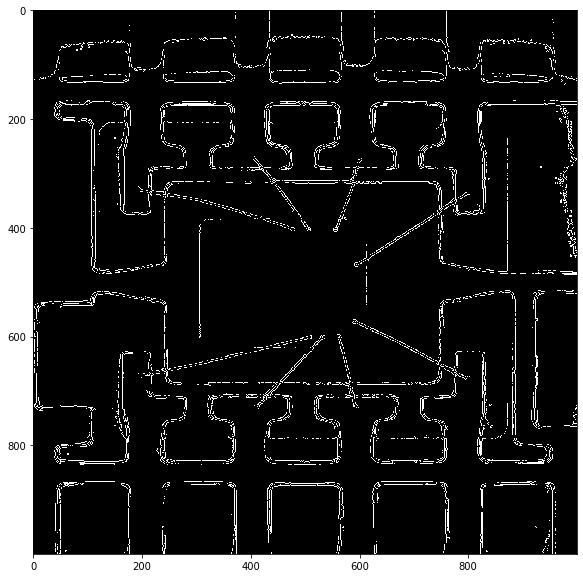

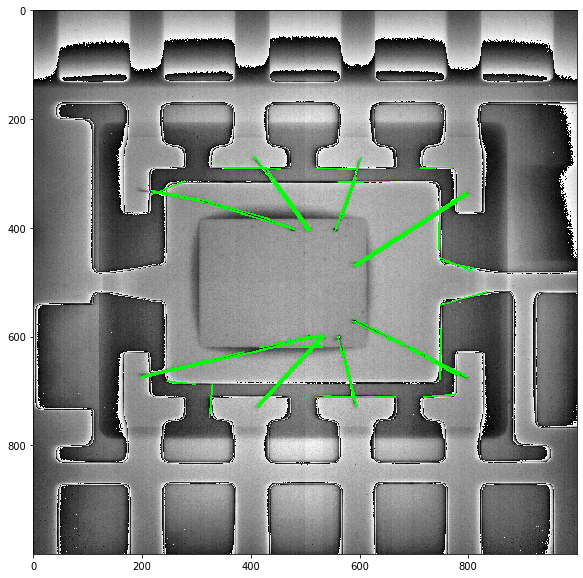

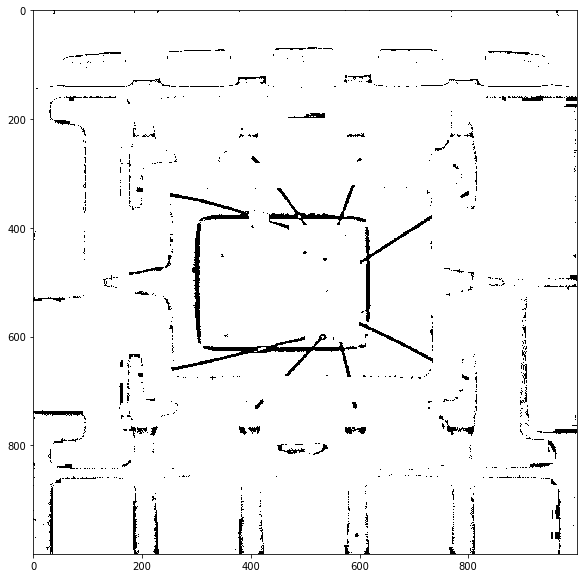

In [178]:
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,19,2)
f_size = 7
for x in range(th1.shape[0]):
    for y in range(th2.shape[1]):
        if(th1[x,y]>250):
            th3[x,y] = 255
            for i in range(f_size*2+1):
                for j in range(f_size*2+1):
                    if x-f_size+i<1000 and y-f_size+j<1000:
                        th3[x-f_size+i,y-f_size+j] = 255                    
    
        
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(th3,cmap = 'gray')

In [55]:
th3.min()

0

In [56]:
import numpy as np

original = cv2.imread("BGA03.tif")
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
retval, image = cv2.threshold(original, 120, 255, cv2.THRESH_BINARY)

cv2.imwrite("dilated.png", image)

contours, hierarchy = cv2.findContours(
    original,
    cv2.RETR_LIST,
    cv2.CHAIN_APPROX_SIMPLE
)

drawing = cv2.imread("BGA03.tif")

centers = []
radii = []
for contour in contours:
    area = cv2.contourArea(contour)

    # there is one contour that contains all others, filter it out
    if area > 1:
        continue

    br = cv2.boundingRect(contour)
    radii.append(br[2])

    m = cv2.moments(contour)
    center = (int(m['m10'] / m['m00']), int(m['m01'] / m['m00']))
    centers.append(center)
    
print(len(centers))

0


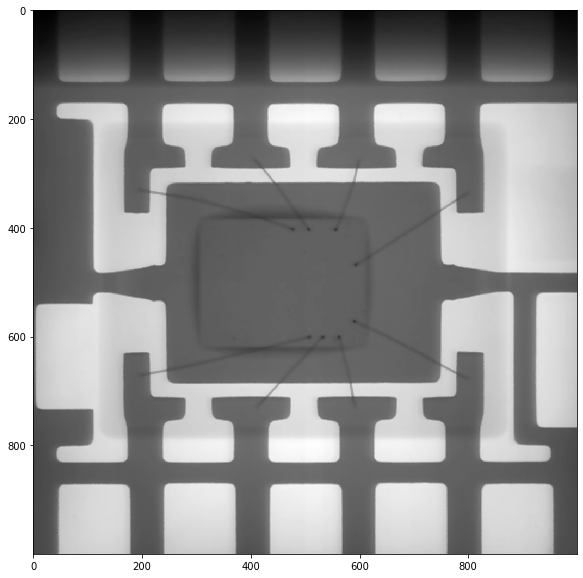

In [359]:
import cv2 
import numpy as np 
img = cv2.imread('WS06.jpg')
img = cv2.GaussianBlur(img,(5,5),5)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
# for i in range(gray.shape[0]):
#     for j in range(gray.shape[1]):
#         if(gray[i,j]>200):
#             gray[i,j]=255
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
gray = cv2.filter2D(gray, -1, kernel)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(gray,cmap = 'gray')

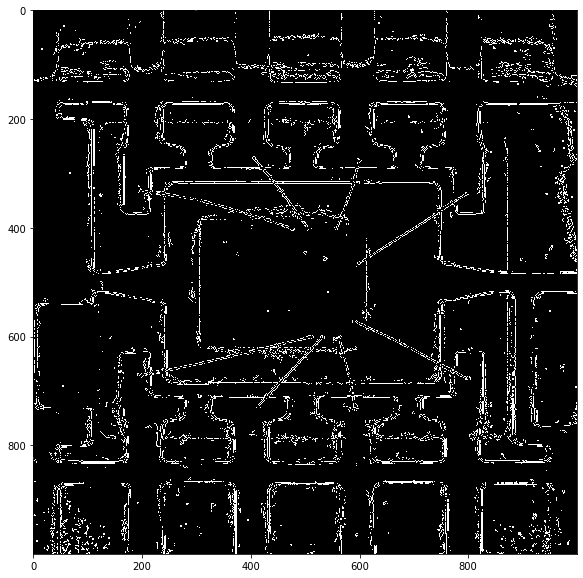

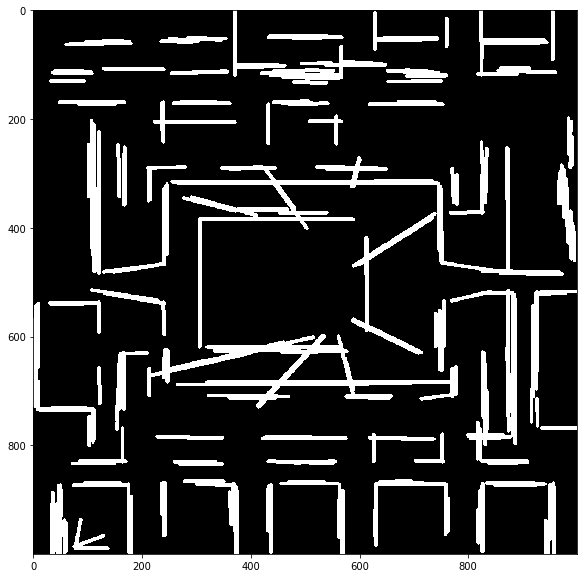

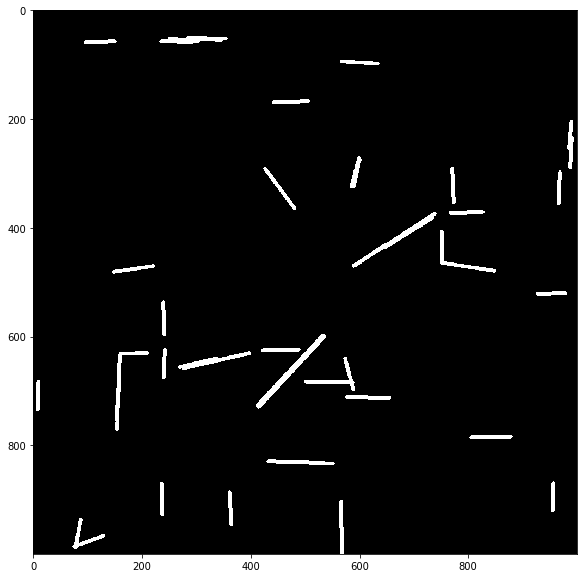

In [417]:
img = cv2.imread('WS06.jpg')*4
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(edges,cmap = 'gray')
rho = 0.5  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 10  # maximum gap in pixels between connectable line segments
line_image = np.copy(gray) * 0  # creating a blank to draw lines on
output = np.copy(gray)*0

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(line_image,cmap = 'gray')
  
f_size = 7    
for line in lines:
    for x1,y1,x2,y2 in line:
        draw = True
        for i in range(f_size*2+1):
                for j in range(f_size*2+1):
                    if x1-f_size+i>=0 and x1-f_size+i<line_image.shape[0] and y1-f_size+j>=0 and y1-f_size+j<line_image.shape[1]:
                        if line_image[x1-f_size+i,y1-f_size+j]==255:
                            draw = False
                    if x2-f_size+i>=0 and x2-f_size+i<line_image.shape[0] and y2-f_size+j>=0 and y2-f_size+j<line_image.shape[1]:
                        if line_image[x2-f_size+i,y2-f_size+j]==255:
                            draw = False

        if draw and x1!=x2 and y1!=y2:
            cv2.line(output,(x1,y1),(x2,y2),(255,0,0),5)


                
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(output,cmap = 'gray')

(1000, 1000)

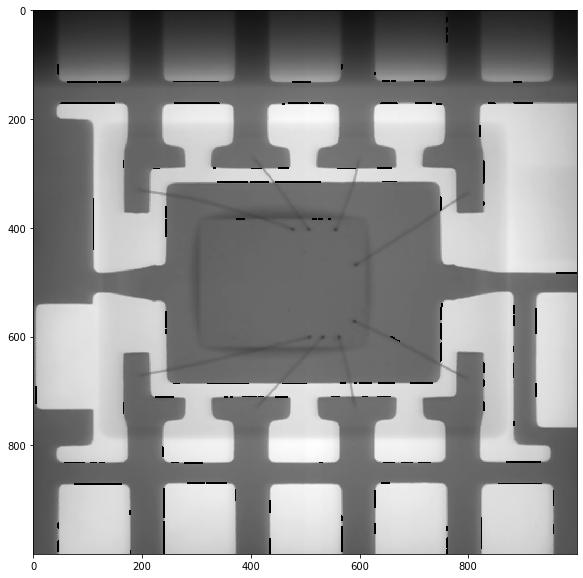

In [304]:

edges = cv2.Canny(gray,1,50,apertureSize = 3)
minLineLength = 500 
maxLineGap = 5 

lines = cv2.HoughLinesP(edges,1,np.pi/180,90,minLineLength,maxLineGap)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(gray,(x1,y1),(x2,y2),(0,128,0),2)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(gray,cmap = 'gray')


In [305]:
gray.mean()

137.318948